pobranie danych i stworzenie wykresówe

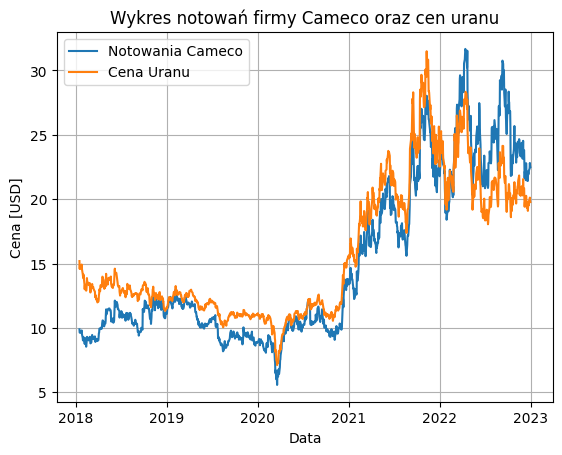

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\ononi\OneDrive\Pulpit\studia\statystykastosowana\projekt\projekt.xlsx')
data_cameco = df[:1250]["otwarcie"]
data_uranium = df[1250:]["otwarcie"]
dates = df[:1250]['Data']
plt.plot(dates, data_cameco, label='Notowania Cameco')
plt.plot(dates, data_uranium, label='Cena Uranu')
plt.title('Wykres notowań firmy Cameco oraz cen uranu')
plt.xlabel('Data')
plt.ylabel('Cena [USD]')
plt.grid()
plt.legend()
plt.show()


liczenie podstawowych statystyk

In [30]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\ononi\OneDrive\Pulpit\studia\statystykastosowana\projekt\projekt.xlsx')


def mediana(data):
    copy=data[:].values.tolist()
    copy.sort()
    n=len(data)
    if n % 2 ==1:
        return copy[n//2]
    else:
        return (copy[n//2-1] + copy[n//2])/2
    
def kwartyle(data):
    n=len(data)
    if n % 2 == 0:
        return mediana(data[:n//2]), mediana(data[n//2:])
    else:
        return mediana(data[:n//2]), mediana(data[n//2+1:])
    
def mnozenie(data):
    result = 1
    for x in data:
        result = result * x
    return result

def wariancja_pr(data):
    return sum((data-sum(data)/len(data))**2)/(len(data)-1)

def IQR(data):
    return kwartyle(data)[0]-kwartyle(data)[1] 

data_cameco = df[:1250]["otwarcie"]
data_uranium = df[1250:]["otwarcie"]

print("CAMECO")
print("min",min(data_cameco))
print("max",max(data_cameco))
print("1kwartyl",kwartyle(data_cameco)[1])
print("2kwartyl",mediana(data_cameco))
print("3kwartyl",kwartyle(data_cameco)[0])
print("wariancja próbkowa", wariancja_pr(data_cameco))
print("IQR", IQR(data_cameco))
print("rozstęp z danych",max(data_cameco)-min(data_cameco))
print("średnia arytmetyczna",sum(data_cameco)/len(data_cameco))
print("średnia harmoniczna",len(data_cameco)/sum(1/data_cameco))
print("średnia geometryczna",(mnozenie(i**(1/len(data_cameco)) for i in data_cameco)))
print()

print("URAN")
print("min",min(data_uranium))
print("max",max(data_uranium))
print("1kwartyl",kwartyle(data_uranium)[1])
print("2kwartyl",mediana(data_uranium))
print("3kwartyl",kwartyle(data_uranium)[0])
print("wariancja próbkowa",wariancja_pr(data_uranium))
print("IQR", IQR(data_uranium))
print("rozstęp z danych",max(data_uranium)-min(data_uranium))
print("średnia arytmetyczna",sum(data_uranium)/len(data_uranium))
print("średnia harmoniczna",len(data_uranium)/sum(1/data_uranium))
print("średnia geometryczna",(mnozenie(i**(1/len(data_uranium)) for i in data_uranium)))

CAMECO
min 5.57
max 31.67
1kwartyl 10.21
2kwartyl 11.715
3kwartyl 21.08
wariancja próbkowa 40.74406079878304
IQR 10.869999999999997
rozstęp z danych 26.1
średnia arytmetyczna 14.972184000000006
średnia harmoniczna 12.789488627615086
średnia geometryczna 13.773522066116717

URAN
min 7.11
max 31.49
1kwartyl 12.04
2kwartyl 13.1
3kwartyl 20.26
wariancja próbkowa 28.24564721479586
IQR 8.220000000000002
rozstęp z danych 24.38
średnia arytmetyczna 15.838823999999995
średnia harmoniczna 14.31928296298242
średnia geometryczna 15.028610961976348


boxploty

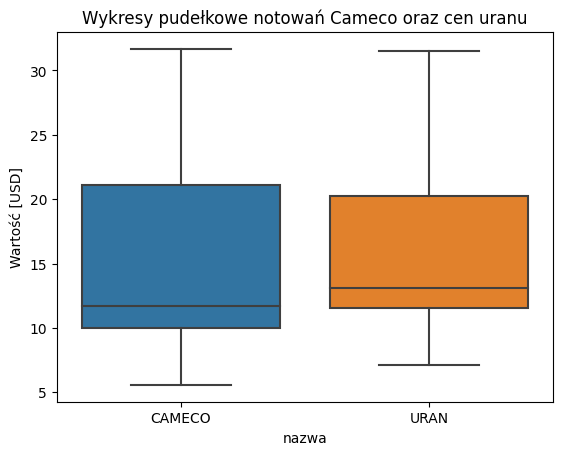

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\ononi\OneDrive\Pulpit\studia\statystykastosowana\projekt\projekt.xlsx')

ax = sns.boxplot(y="otwarcie", x="nazwa", data=df)
plt.title('Wykresy pudełkowe notowań Cameco oraz cen uranu')
plt.ylabel('Wartość [USD]')
plt.show()

histogram

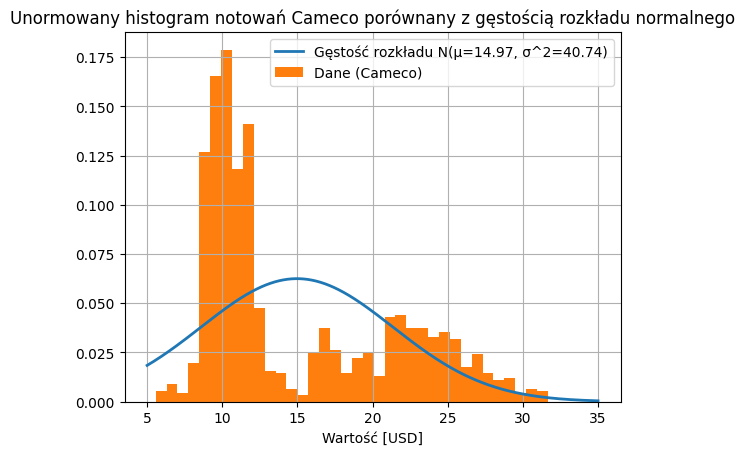

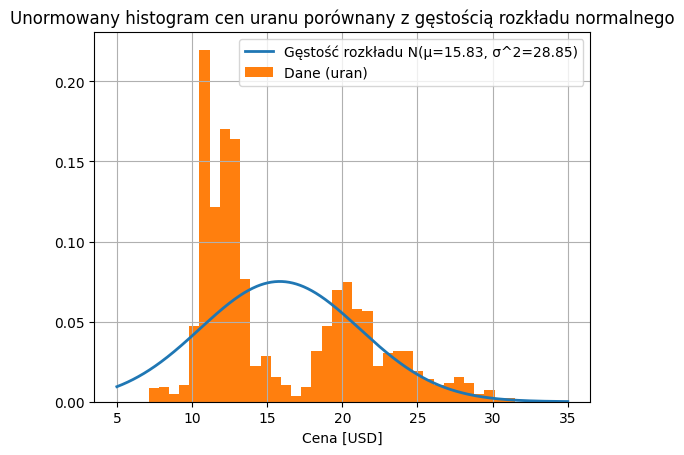

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np


df = pd.read_excel(r'C:\Users\ononi\OneDrive\Pulpit\studia\statystykastosowana\projekt\projekt.xlsx')

x=np.linspace(5,35,1000)
plt.grid()
plt.plot(x, norm.pdf(x, loc=sum(data_cameco)/len(data_cameco), scale=(wariancja_pr(data_cameco))**0.5), label='Gęstość rozkładu N(μ=14.97, σ^2=40.74)',lw=2)
plt.hist(data_cameco, bins='sqrt', label='Dane (Cameco)', density=True)
plt.xlabel('Wartość [USD]')
plt.title('Unormowany histogram notowań Cameco porównany z gęstością rozkładu normalnego')
plt.legend()
plt.show()


plt.grid()
plt.plot(x, norm.pdf(x, loc=sum(data_uranium)/len(data_uranium), scale=(wariancja_pr(data_uranium))**0.5), label='Gęstość rozkładu N(μ=15.83, σ^2=28.85)',lw=2)
plt.hist(data_uranium, bins="sqrt", label='Dane (uran)', density=True)
plt.xlabel('Cena [USD]')
plt.title('Unormowany histogram cen uranu porównany z gęstością rozkładu normalnego')
plt.legend()
plt.show()


Średnia winsorowska i ucinana

c:\Users\ononi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ononi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


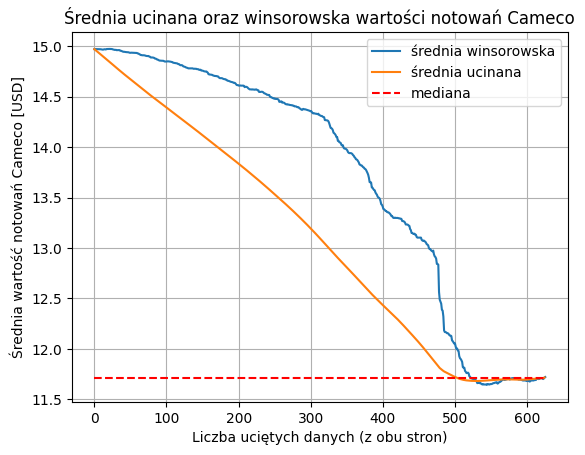

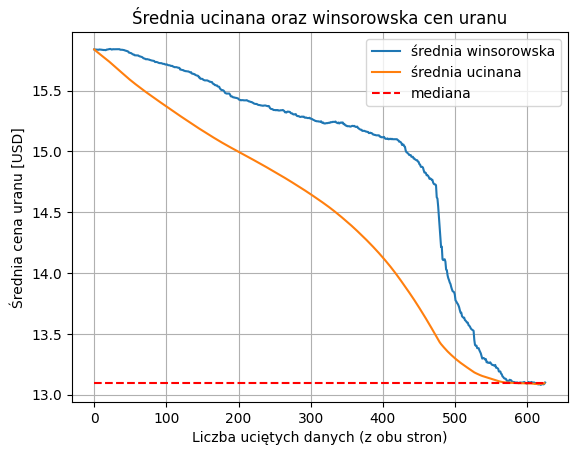

In [33]:
import scipy.stats as stats


def winsorized_mean(data_cameco, data_uranium):
    means_cameco = []
    means_uranium = []
    win_limits = np.linspace(0, 0.5, 625)
    for lim in win_limits:
        data = stats.mstats.winsorize(np.array(data_cameco), (lim, lim))
        means_cameco.append(sum(data)/len(data))
        data = stats.mstats.winsorize(np.array(data_uranium), (lim, lim))
        means_uranium.append(sum(data)/len(data))
    return means_cameco, means_uranium

def trimmed_mean(data_cameco, data_uranium):
    means_cameco = []
    means_uranium = []
    trim_limits = np.linspace(0, 0.5, 625)
    for lim in trim_limits:
        means_cameco.append(stats.trim_mean(data_cameco, lim))
        means_uranium.append(stats.trim_mean(data_uranium, lim))
    return means_cameco, means_uranium
df = pd.read_excel(r'C:\Users\ononi\OneDrive\Pulpit\studia\statystykastosowana\projekt\projekt.xlsx')

data_uranium = df[1250:]['otwarcie']
data_cameco = df[:1250]['otwarcie']
dates = df[:1250]['Data']
win_mean_cameco, win_mean_uranium = winsorized_mean(data_cameco, data_uranium)
tri_mean_cameco, tri_mean_uranium = trimmed_mean(data_cameco, data_uranium)
xs = np.linspace(0, 625, 625)

plt.plot(xs, win_mean_cameco, label='średnia winsorowska')
plt.plot(xs, tri_mean_cameco, label='średnia ucinana')
plt.hlines(11.715, 0, 625, colors='red', linestyles='dashed', label='mediana')
plt.title('Średnia ucinana oraz winsorowska wartości notowań Cameco')
plt.xlabel('Liczba uciętych danych (z obu stron)')
plt.ylabel('Średnia wartość notowań Cameco [USD]')
plt.grid()
plt.legend()
plt.show()

plt.plot(xs, win_mean_uranium, label='średnia winsorowska')
plt.plot(xs, tri_mean_uranium, label='średnia ucinana')
plt.hlines(13.1, 0, 625, colors='red', linestyles='dashed', label='mediana')
plt.title('Średnia ucinana oraz winsorowska cen uranu')
plt.xlabel('Liczba uciętych danych (z obu stron)')
plt.ylabel('Średnia cena uranu [USD]')
plt.grid()
plt.legend()
plt.show()
    

Współczynnik skośności, zmienności i kurtoza

In [34]:
import pandas as pd
df = pd.read_excel(r'C:\Users\ononi\OneDrive\Pulpit\studia\statystykastosowana\projekt\projekt.xlsx')

data_uranium = df[1250:]['otwarcie']
data_cameco = df[:1250]['otwarcie']

print('CAMECO')
print(f'Współczynnik skośności: {stats.skew(data_cameco)}')
print(f'Współczynnik zmienności: {stats.variation(data_cameco)}')
print(f'Kurtoza: {stats.kurtosis(data_cameco, fisher=True)}')

print('URAN')
print(f'Współczynnik skośności: {stats.skew(data_uranium)}')
print(f'Współczynnik zmienności: {stats.variation(data_uranium)}')
print(f'Kurtoza: {stats.kurtosis(data_uranium, fisher=True)}')

CAMECO
Współczynnik skośności: 0.7943656772786862
Współczynnik zmienności: 0.42616051889778833
Kurtoza: -0.777065639938713
URAN
Współczynnik skośności: 0.745960992560808
Współczynnik zmienności: 0.3354123465413893
Kurtoza: -0.6317013512514253


# Analiza porównawcza

estymatory gęstości

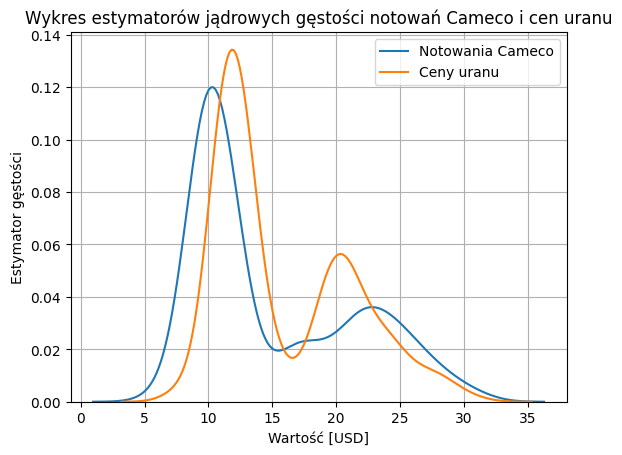

In [35]:
import seaborn as sns
import pandas as pd
df = pd.read_excel(r'C:\Users\ononi\OneDrive\Pulpit\studia\statystykastosowana\projekt\projekt.xlsx')

data_uranium = df[1250:]['otwarcie']
data_cameco = df[:1250]['otwarcie']
dates = df[:1250]['Data']

sns.kdeplot(data_cameco, label='Notowania Cameco')
sns.kdeplot(data_uranium, label='Ceny uranu')
plt.xlabel('Wartość [USD]')
plt.ylabel('Estymator gęstości')
plt.title('Wykres estymatorów jądrowych gęstości notowań Cameco i cen uranu')
plt.legend()
plt.grid()
plt.show()

Dystrybuanty empiryczne

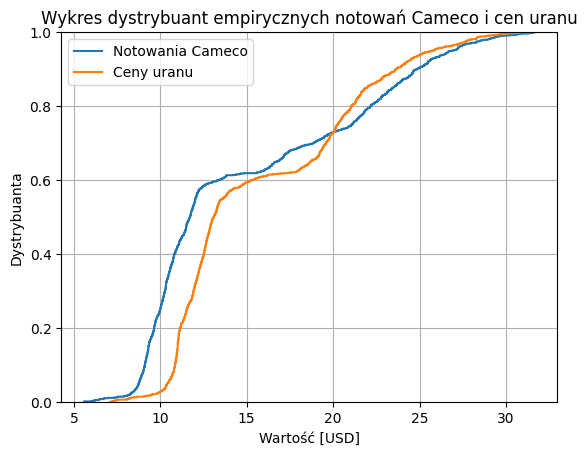

In [36]:
sns.ecdfplot(data_cameco, label='Notowania Cameco')
sns.ecdfplot(data_uranium, label='Ceny uranu')
plt.xlabel('Wartość [USD]')
plt.ylabel('Dystrybuanta')
plt.title('Wykres dystrybuant empirycznych notowań Cameco i cen uranu')
plt.legend()
plt.grid()
plt.show()

Współczynnik korelacji Pearsona i Spearmana

Współczynnik korelacji Pearsona: (0.9460905983268506, 0.0)
Współczynnik korelacji Spearmana: SpearmanrResult(correlation=0.9024490938333106, pvalue=0.0)


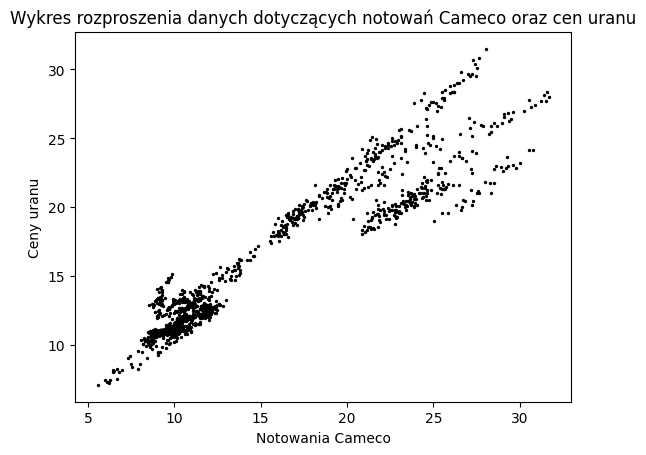

In [37]:
import scipy.stats as stats

print(f'Współczynnik korelacji Pearsona: {stats.pearsonr(data_cameco, data_uranium)}')
print(f'Współczynnik korelacji Spearmana: {stats.spearmanr(data_cameco, data_uranium)}')
plt.scatter(data_cameco, data_uranium, color='black', s=2)
plt.title('Wykres rozproszenia danych dotyczących notowań Cameco oraz cen uranu')
plt.xlabel('Notowania Cameco')
plt.ylabel('Ceny uranu')
plt.show()

Regresja liniowa dla danych

In [38]:
print(stats.linregress(data_cameco, data_uranium))

LinregressResult(slope=0.7877280971102394, intercept=4.044813988095626, rvalue=0.9460905983268507, pvalue=0.0, stderr=0.007633963868659369, intercept_stderr=0.12424326251492232)
